**Project Assignment**

**Formalities**

This is the project for the course Probability and Statistical Learning Using Python, 2022. Here, you are asked to carry out the analysis using the tools, techniques, and skills acquired in the course and hand in a .pynb file with the solutions.

The **deadline  is Friday, October
28, 2022.** You should upload the solution file to 'Project Assignment' in Canvas via 'Home-->Project Assignment'.
Note that this is an individual exam.

**Part I**

In this exercise we will estimate the test error of logistic regression model using the below described validation set approach. You will neeed to import the *Default.csv* file provided. 

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn import preprocessing
import statsmodels.api as sm

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import patsy
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
np.random.seed(5)

df = pd.read_csv("Default.csv", index_col=0)

In [3]:
df.head(10)

,default,student,balance,income
1,No,No,729.526495,44361.625070
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138950
4,No,No,529.250605,35704.493940
5,No,No,785.655883,38463.495880
6,No,Yes,919.588531,7491.558572
7,No,No,825.513331,24905.226580
8,No,Yes,808.667504,17600.451340
9,No,No,1161.057854,37468.529290
10,No,No,0.000000,29275.268290


In [4]:
# Checking if there is any missing values in dataset due to data corruption
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

(a) Fit a logistic regression model that uses $income$ and $balance$ to
predict $default$ and print out the summary. **(3 pts)**

In [5]:
# map 'Yes' and 'No' to '1' and '0'
df['default'] = df['default'].map({'Yes': 1, 'No': 0})
df['student'] = df['student'].map({'Yes': 1, 'No': 0})

# scale the feature, Use MinMaxScaler method
X = df[['balance','income']]
y = df['default']
scaler = preprocessing.MinMaxScaler()
X_scaler = scaler.fit_transform(X)

# generate new dataframe df_scaled which contains column 'default' and scaled 'balance'&'income', set index start from 1 as df 
df_scaled = pd.DataFrame(X_scaler, columns=['balance','income'])
df_scaled.index = np.arange(1,len(df_scaled)+1)
df_scaled['default'] = df['default']

# create the model and fit it
logit_model = smf.logit(formula='default~balance+income',data=df_scaled)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.4594
Time:                        15:51:46   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5244      0.433    -26.635      0.000     -12.372     -10.676
balance       14.9892      0

(b) You are supposed to estimate the test error of this model using the validation set approach described below. In order to do this, you must perform the following steps: **(4 pts)**

i. Split the sample set into a training set and a validation set.

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(X_scaler, y, test_size=0.3, random_state=5)

ii. Fit a multiple logistic regression model using only the training
observations.

In [7]:
# fit the logistic regression model using training dataset
model = LogisticRegression(penalty="none",max_iter=1000,solver = "newton-cg")
# model = LogisticRegression()
model.fit(X_train, y_train)

print(model.intercept_)
print(model.coef_)

[-10.94692825]
[[14.31448795  1.081739  ]]


iii. Obtain a prediction of default status for each individual in
the validation set (test set) by computing the posterior probability of
$default$ for that individual, and classifying the individual to
the $default$ category if the posterior probability is greater
than 0.5.

In [8]:
predictions = model.predict(X_validation)

iv. Compute the validation set error, which is the fraction of
the observations in the validation set (test set) that are misclassified.

In [9]:
score = accuracy_score(y_validation, predictions, normalize=True)
print(f'The observations in the validation set (test set) that are misclassified is {1.0-score}')

The observations in the validation set (test set) that are misclassified is 0.025000000000000022


(c) Now consider a logistic regression model that predicts the probability of default using $income$, $balance$, a dummy variable for $student$ and print the summary. Estimate the test error for this model using the validation
set approach. Comment on the results. Does the inclusion of a dummy variable for student lead to a reduction in the test error? **(3 pts)**

In [10]:
# generate new dataframe df_scaled_2, create the model and fit it 
df_scaled['student'] = df['student']

logit_model = smf.logit(formula='default ~ student + balance + income',data=df_scaled)
result = logit_model.fit()
print(result.summary())

# Split the sample set into a new training set and a validation set.
X_train2, X_validation2, y_train2, y_validation2 = train_test_split(df_scaled[['student','balance','income']], y, test_size=0.3, random_state=5)
model2 = LogisticRegression(penalty="none",max_iter=1000,solver = "newton-cg")
model2.fit(X_train2, y_train2)

# Estimate the test error for this model using the validation dataset
predictions_2 = model2.predict(X_validation2)
score_2 = accuracy_score(y_validation2, predictions_2, normalize=True)
print('')
print(f'After adding "student" as a dummy variable, the observations in the validation set (test set) that are misclassified is {1.0-score_2}')

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.4619
Time:                        15:51:46   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8667      0.488    -22.263      0.000     -11.823      -9.910
student       -0.6468      0

$\textbf{Answer}$:  
The test error before is about 0.025, after adding 'student' as a dummy variable, the fraction of test error is 0.025667, so the inclusion of a dummy variable for student doesn't lead to a reduction in the test error.

**Part II**

In [11]:
import numpy as np
import pandas as pd
from math import sqrt
import random
from matplotlib import pyplot as plt
import sys
import seaborn
from scipy.spatial.distance import euclidean
import warnings

# pd.set_option('display.max_rows', 100)

In this exercise, you will demonstrate your understanding of the KNN classification algorithm and test it on a breast cancer dataset. The algorithm should be implemented in pure python, without using the sklearn library.

**KNN algorithm**

(a)  Implement a function of your own to perform KNN classification **without using the default available libraries such as KNeighborsClassifier() in sklearn**. You will need to consider the Euclidean distances between the features and data to be predicted (test data) when selecting the k-nearest neighbors. The function should take 3 inputs as 1) data set to train the model 2) data to test 3) number of neighbours (k). If *k* is set to a value less than or equal to the total classification groups, the function should give a warning, and  warn() function defined in the 'warning' module will be useful for that.

The function should output *classification_result*, where *classification_result* is the result of your classifier. Further, you should provide a suitable measure of the confidence on the classification. Justify your choice. 

Please note that only a few basic libraries/modules are imported and thus you are expected to import the needed others. 



**Hint:** You may fill and complete the function given below.                **(5 pts)** 

In [12]:
def knn_algorithm(traindata, testdata, k_neighbours=5):
    
    classification_result = np.zeros(shape=(1,testdata.shape[0]))
    confidence_array = np.zeros(shape=(1,testdata.shape[0]))

    # set a warning message when k is less than or equal to the total classification groups
    if k_neighbours <= traindata.drop(testdata.columns.values, axis=1).nunique().values:
        warnings.warn('k is set to a value less than or equal to the total classification groups')
    else:
        pass
    
    # convert pandas.dataframe to np.array, to speed up the running time when calculating Euclidean distances
    traindata_X_array = traindata[testdata.columns].to_numpy()
    traindata_y_array = traindata.drop(testdata.columns, axis=1).to_numpy()
    test_data_array = testdata.to_numpy()

    # Calculate Euclidean distances
    for i in range(testdata.shape[0]):
        near_points = None
        feature_distance_list = []

        x_columns = testdata.columns
        for j in range(traindata.shape[0]):
            
            # for each 'point' in testing dataset, calculate distance with all 'points' in training dataset
            euclidean_distance = np.sqrt(np.sum((test_data_array[i]-traindata_X_array[j])**2))

            # for each 'point' in testing, generate a list which contains all value of y and euclidean distance
            feature_distance_list.append([traindata_y_array[j][0], euclidean_distance])

        # sorted the list by distance generated in the last step
        sorted_list = sorted(feature_distance_list,key=lambda x:x[1])
        df_sorted_list = pd.DataFrame(sorted_list, columns=['dependent_variable','distance'])


        # take the first k_neighbours rows, which is exactly the k_nearest neighbours
        df_neighbours = df_sorted_list.head(k_neighbours)

        # k_neighbours vote for the final result, minority obeys majority
        classes = df_neighbours['dependent_variable'].value_counts()
        proportions = classes / classes.sum()
        classification_result[0][i] = proportions.index[0]

        # confidence for each 'point' in testing dataset is the proportion of the classification_result (the rate of the majority)
        confidence_array[0][i] = proportions.iloc[0]

    # confidence = np.mean(confidence_array)
       
    return classification_result, confidence_array

#### Now let's test the implemented KNN algorithm on the given breast cancer dataset.

This dataset contains records of breast cancer patients. Here we will use the features (columns) to predict the correct cancer class (last column) for the patients in the dataset as shown below. 

In [13]:
columns = ['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion',
           'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses', 'class']

df = pd.read_csv('breast-cancer-wisconsin.data', header=None, names=columns)
df.head(10)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


#### Explore the data

(b) Check how many different cancer classes are available, and plot a pie chart to see the distribution of classes. Then, find and replace all the missing values with the mode of the particular column(s). Note that the missing values are marked with '?' in the dataset. **(1 pt)** 

There are 2 different cancer classes, which are class 2 and class 4.


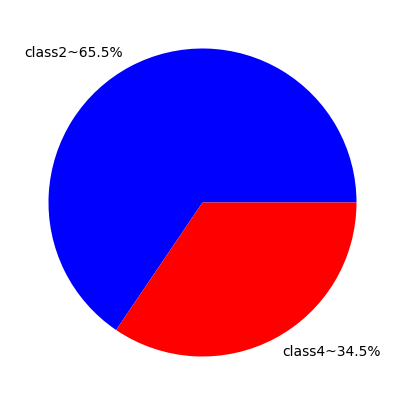

id                         0
clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marg_adhesion              0
single_epith_cell_size     0
bare_nuclei               16
bland_chrom                0
norm_nucleoli              0
mitoses                    0
class                      0
dtype: int64

In [14]:
# detect how many different cancer classes 
uniqueValues = df['class'].unique()
print(f'There are {len(uniqueValues)} different cancer classes, which are class {uniqueValues[0]} and class {uniqueValues[1]}.')

# plot pie chart
fig , ax = plt.subplots(figsize=(20,5))

classes = df['class'].value_counts()
proportions = classes / classes.sum()
labels = ['class{}~{:.3}%'.format(i,v*100) for i,v in proportions.items()]

classes.plot.pie(ax=ax, colors=['b','r'], labels=labels)
ax.set_ylabel('')
plt.show()

# find the missing value, first repalce it to NaN
df = df.replace(['?'],np.NaN)
df.isnull().sum()

In [15]:
# replace the missing value with the mode value of that column
df = df.apply(pd.to_numeric)
mode = df['bare_nuclei'].mode()
df['bare_nuclei'].fillna(mode[0], inplace =True)

# check the missing value again, this time the number of missing value should be 0
df.isnull().sum()

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marg_adhesion             0
single_epith_cell_size    0
bare_nuclei               0
bland_chrom               0
norm_nucleoli             0
mitoses                   0
class                     0
dtype: int64

#### Feature engineering

(c) Drop the obiviously unwanted column(s). **(1 pt)**

In [16]:
# drop unwanted column - 'id'
df = df.drop("id",axis=1)
df.head(5)

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


#### Split the training and test data

(d) In here, you will split the data into training and test sets, **without using sklearn library.** Please use 20% of the dataset as test set and the rest for train set. Shuffle the data prior to splitting in order to prevent any bias during the training and to avoid the model from learning the order of the training. **(5 pts)**

In [17]:
def my_train_test_split(X, y, test_size, random_state=None):

    # add y as a column to X, use df.sample() to shuffle the whole dataset
    X = pd.DataFrame(X)
    X[y.columns.values.tolist()[0]] = y
    shuffled_df = X.sample(frac=1,random_state=random_state)

    # calculate the number of training dataset and testing dataset
    total_number = X.shape[0]
    number_of_testdata = int(np.ceil(total_number*test_size))
    number_of_traindata = total_number - number_of_testdata

    # get the training dataset and testing dataset
    train_set = shuffled_df[:number_of_traindata]
    test_set = shuffled_df[number_of_traindata:]

    # split the testing dataset to X_test and y_test
    # X_train = train_set.drop(y.columns.values, axis=1)
    # y_train = train_set[y.columns.values]
    X_test = test_set.drop(y.columns.values, axis=1)
    y_test = test_set[y.columns.values]

    # return X_train, X_test, y_train, y_test
    return train_set, X_test, y_test

# define dataset
X = df.drop(['class'],axis=1)
y = df[['class']]

# scale the feature, Use StandardScaler method
scaler = preprocessing.StandardScaler()
X_scaler = scaler.fit_transform(X)

# Split the Training and Test dataset,set test_size = 0.2
train_dataset, X_test, y_test = my_train_test_split(X_scaler, y, test_size=0.2, random_state=5)

#### Predict the class for test data and calculate the accuracy

(e) Now train the KNN classifier you developed in (a) using the training set, and test it on the test set with *k_neighbours=5*. **(4 pts)**

Print the confidence for the incorrect predictions the classifier has made.

Find the accuracy of the predictions.

In [18]:
from sklearn.metrics import accuracy_score

# create KNN model and output the prediction and confidence
result,confidence = knn_algorithm(train_dataset, X_test, k_neighbours=5)

# calculate the accuracy of the model
y_true = y_test.transpose().to_numpy().astype(int)
accuracy = accuracy_score(y_true[0], result.astype(int)[0])
print('When test_size is 0.2, the accuracy of the predictions is: {:.4f}'.format(accuracy))

# define function to output the confidence for the incorrect predictions
def incorrect_prediction_confidence(y_true,result,confidence):

    incorrect_pred_confidence = []
    for i in range(len(y_true[0])):
        if y_true[0][i] == result.astype(int)[0][i]:
            pass
        else:
            incorrect_pred_confidence.append(confidence[0][i])
    return incorrect_pred_confidence

# output the confidence for the incorrect predictions
incorrect_pred_confidence = incorrect_prediction_confidence(y_true,result,confidence)
print('When test_size is 0.2, the confidence for the incorrect predictions the classifier has made is :', incorrect_pred_confidence)

When test_size is 0.2, the accuracy of the predictions is: 0.9714
When test_size is 0.2, the confidence for the incorrect predictions the classifier has made is : [0.6, 0.6, 0.8, 0.6]


**Effect of reduction in training data size on confidence of predictions**

(f) Now increase the test set size to 40% of the dataset while keeping the same *k_neighbours* and print the confidence and accuracy of the predictions similar to the previous question. Explain the results in comparison with (e) **(2 pts)**

In [19]:
# split the training dataset and testing dataset, set test_size=0.4
train_dataset2, X_test2, y_test2 = my_train_test_split(X_scaler, y, test_size=0.4, random_state=5)

# create KNN model and output the prediction and confidence
result2,confidence2 = knn_algorithm(train_dataset2, X_test2, k_neighbours=5)

# calculate the accuracy of the model
y_true2 = y_test2.transpose().to_numpy().astype(int)
accuracy = accuracy_score(y_true2[0], result2.astype(int)[0])
print('When test_size is 0.4, the accuracy of the predictions is: {:.4f}'.format(accuracy))

# output the confidence for the incorrect predictions
incorrect_pred_confidence = incorrect_prediction_confidence(y_true2,result2,confidence2)
print('When test_size is 0.4, the confidence for the incorrect predictions the classifier has made is :', incorrect_pred_confidence)


When test_size is 0.4, the accuracy of the predictions is: 0.9643
When test_size is 0.4, the confidence for the incorrect predictions the classifier has made is : [0.6, 0.8, 0.6, 0.6, 1.0, 1.0, 0.6, 0.6, 0.8, 0.6]


$\textbf{Answer}$:
 
When increase test set size to 40%,  the accuracy of model predictions decreases from 97.14% to 96.43% and the mean of confidence for the incorrect predictions increases.  
This is because the total size of dataset for trainng and testing is fixed, when we increase the test set size from 20% to 40%, which means the model get less datasets for training, so the accuracy decreases.

#### Alternative classification methods


(g) Propose alternative classification approaches for this problem and discuss the advantages and disadvantages with respect to KNNs (you don't need to implement them). **(2 pts)**

$\textbf{1. Logistic Regression}$ model can be used for this problem  
 - $\textbf{advantages}$:

    - Logistic Regression model can handle a large number of feature, however, the KNNs doesn't work well with a high number of dimensions.
    - Logistic Regression is comparatively faster than KNNs.

- $\textbf{disadvantages}$:

    - Logistic regression assumes that the dependent variable only takes on two possible outcomes, but KNNs can handle more dependent variable values.
    - Logistic regression assumes that the observations in the dataset are independent of each other which is usually not true in reality, but KNNs doesn't have that assumption.


$\textbf{2. Decision Tree Classification}$ can also be used for this problem 
 
 - $\textbf{advantages}$:
    - There is less requirement of data preprocessing compared to KNNs, KNNs are  more sensitive to noisy and missing data, and in KNNs the feature should be scaled properly.

 - $\textbf{disadvantages}$:
    - Decision Tree Classification could be more instable than KNNs because of a small change in the dataset.